## Slide 1

### What is Transfer Learning?

- Transfer learning has become so handy for computer vision geeks.

- It’s basically a mechanism where the knowledge acquired by training a model for achieving a task is efficiently modified or optimized in order to accomplish the second related task.

- For example, a neural network trained on object recognition can be used to read x-ray scans. 

- This is achieved by freezing the weights until the initial or mid-layers are learned on the data for task A, removing the last layer or a few of the last layers, and adding new layers and training those parameters using the data for task B.



## Slide 2

### Why Transfer Learning?

Transfer Learning technique is really useful because:

* using a well-trained model which performs really great for task A, we can develop a model which performs elegantly for task B, though we have fewer data available for task B

* there are fewer parameters to be trained (only last layer/layers) and thus less training time,

* there is less demand for heavy computational resources like GPU, TPU (but still depends on the data available for task B).
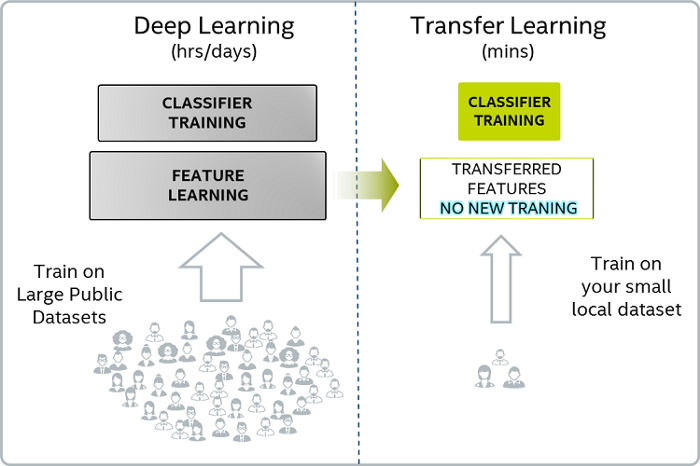

## Slide 3

### How do we do transfer learning?

Transfer learning makes sense when the data in training for task A is quite large and that of task B is relatively smaller.

- By getting trained on such vast amounts of data and showing excellent performance on its test data, this implies that the neural network has a good knowledge of extracting useful features from the input images. This is essential and powerful for achieving a task.

- Now that we have such powerful features from these layers (whose weights from task A are frozen), we just need to make use of these extracted features to achieve task B. So, these features from frozen layers are fed to the new layers and the parameters for these layers are trained on the data of task B.

So basically, we store the knowledge from the previous task in the form of the weights of the frozen layers **(called pre-training)**. Then we make the neural network task B-specific by training **(called fine-tuning)** the latter layers on the new data.

In our project, we will be using pre-trained models which were trained to classify a large set of images(which is the task A), and fine-tune it to make the classifier specific to our classification task of cats vs non-cats(which is task B).

## Slide 4

### What are we going to do now?

* We are going to build a model to classify cats vs non-cats, using transfer learning. 
* We are going to build this, on top of the VGG16 model pretrained on Imagenet database. The VGG16 is a trained CNN primarily built to classify 1000 classes of the ImageNet Database. It is built by using roughly 1.2 million training images, 50,000 validation images, and 150,000 testing images. [More here](https://neurohive.io/en/popular-networks/vgg16/#:~:text=In%20all%2C%20there%20are%20roughly,resolution%20of%20256%C3%97256.).

* We shall use these weights of the VGG16, and fine-tune the model by adding some layers on top of that, in order to customize it for our own purpose - cat vs non-cat classification.
* We use the same weights of the CNNs by freezing them, and we remove the top(which are dense layers) to add our customised dense layers. The customised top dense layers are trained(which is known as fine-tuning), to make it especially learn about our data set.

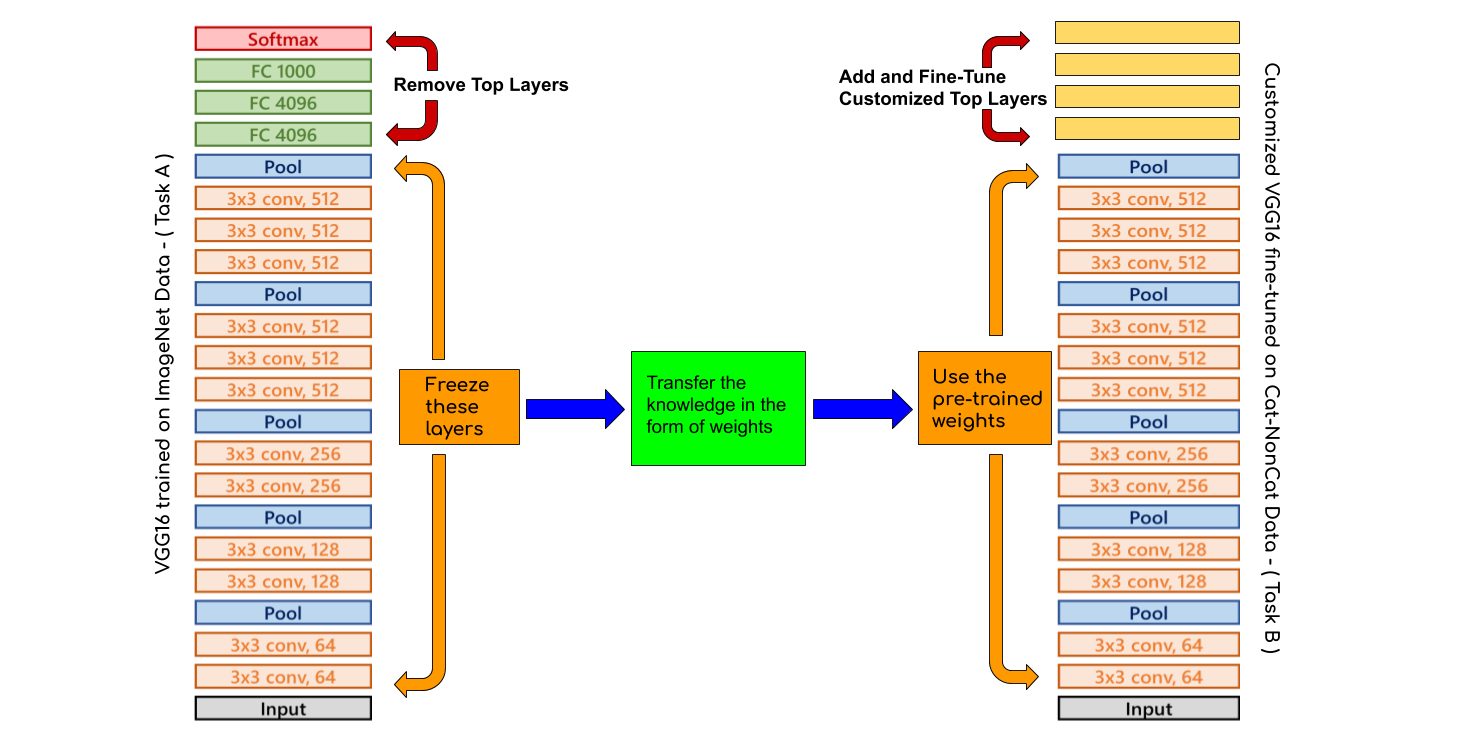

### The VGG16 Model

- Firstly, let us know about the VGG16 model pre-trained on the Imagenet database.

- The VGG16 is a trained CNN primarily built to classify 1000 classes of the ImageNet database.

It is built by using roughly 1.2 million training images, 50,000 validation images, and 150,000 testing images.

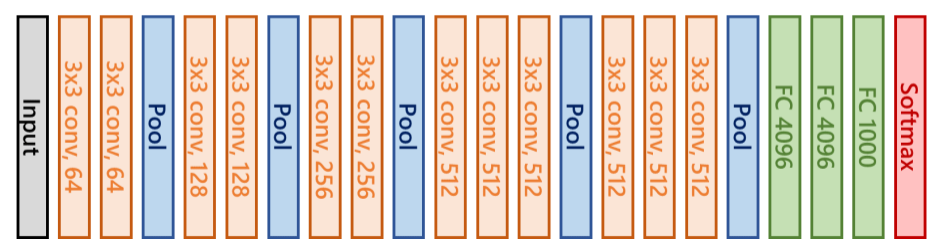

## Slide 5

### Importing modules

We are going to use the following modules for this exercise:

* numpy
* h5py
* matplotlib
* tesnsorflow
* tensorflow.keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


import tensorflow 
from tensorflow.keras.optimizers import SGD       
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import VGG16   #VGG16 pretrained weights    
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, GlobalAveragePooling2D


# to make this notebook's output stable across runs
np.random.seed(42)
# tensorflow.random.set_random_seed(42)
tensorflow.random.set_seed(42)

print("Imported Network Essentials")

Imported Network Essentials


In [ ]:
str(type(tensorflow))

"<class 'module'>"

## Slide 6

### Loading the data

Dataset is located at `/datasets/cat-non-cat`

Dataset is in .h5 file. It is a file format that could store the data - along with its meta-data - in the form of a hierarchy. More about this [here](https://www.youtube.com/watch?v=q14F3WRwSck). Import h5py to interact with a dataset that is stored in an H5 file. It contains

* train_catvnoncat.h5 - a training set of images labeled as cat (y=1) or non-cat (y=0)
* test_catvnoncat.h5 - a test set of images labeled as cat or non-cat
* Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px)
Now, let us load the dataset into our working session.

In [ ]:
train_dataset = h5py.File('/datasets/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/datasets/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

# Load training data
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

# Load test data
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


## Slide 7

### Shape of the data

Let us take a look at the shape of the train set, validation set, and test set.

In [ ]:
print("Train data shape: ",train_set_x_orig.shape)

validation_x = test_set_x_orig[:25] 
validation_y = test_set_y_orig[:25]
print("Validation data shape: ",validation_x.shape)

test_set_x = test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]
print("Test data shape: ",test_set_x.shape)

Train data shape:  (209, 64, 64, 3)
Validation data shape:  (25, 64, 64, 3)
Test data shape:  (25, 64, 64, 3)


We observe that we have very small data. 

So using transfer learning, we could come up with a decent model yielding reasonable accuracy by using our tiny dataset.

## Slide 8

### Visualize the data

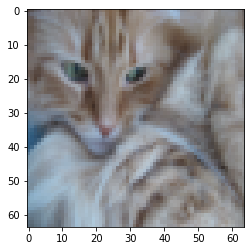

In [ ]:
plt.imshow(train_set_x_orig[2])

## Slide 9

### Get the VGG16 base model

The trained VGG16 model is available with `tensorflow.keras.applications`. We have imported this as `from tensorflow.keras.applications import VGG16` in the Import Modules section. 

Now let us see how we could use.

In [ ]:
vgg_base = VGG16(weights='imagenet', include_top=False)

for layer in vgg_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


We have got an instance of VGG16 model which is trained on 'imagenet' data. 

Since we want to customise it for our purpose of cat-vs-noncat classification, we removes the top layers which are the dense layers.

We put the `vgg_base` layers are not trainable. So we use the same weights of the Convolutional layers as used in VGG16 imagenet dataset. 

## Slide 10

### Customize the model

We shall add the dense layers on top of the pre-trained layers, so as to make it learn about our cat vs non-cat dataset, and use it on our test data.

Let us see how we could do that.



* Create the input layer as follows.
    
        inp = tensorflow.keras.layers.Input(shape=(64, 64, 3), name='image_input')

    Since our dataset has images of shape 64 x 64 x3, we shall set the shape of the input image the same.  Also, we shall give the name of the layer as image_input.

*  Initial a sequential model: 

        #initiate a model
        vgg_model = Sequential() 

* Now, add the pre-trained `vgg_base` to the sequential model `vgg_model` we have initialized.

        #Add the VGG base model
        vgg_model.add(vgg_base)

*  We shall now add the dense layers which we would train further:

        vgg_model.add(tensorflow.keras.layers.GlobalAveragePooling2D())

        vgg_model.add(Dense(1024,activation='relu'))
        vgg_model.add(Dropout(0.6))

        vgg_model.add(Dense(512,activation='relu'))
        vgg_model.add(Dropout(0.5))

        vgg_model.add(Dense(1024,activation='relu'))
        vgg_model.add(Dropout(0.4))

        vgg_model.add(Dense(1024,activation='relu'))
        vgg_model.add(Dropout(0.3))

        vgg_model.add(Dense(1, activation='sigmoid'))

    We have first added the `GlobalAveragePooling2D` layer, and then the dense layer with 1024 neurons and activation function `relu`. 

    Observe that the `Dropout` rate is 0.6, which means 60% of neurons will be randomly ignored during each pass in the training phase in order to make sure the network doesn't overfit. Note that dropout won't be functioning during the test time.

    Similarly, other dense and dropout layers were added. At last, a dense layer with 1 neuron is added, which is the output layer. Thus, we have put the activation function `sigmoid`.



In [ ]:
inp = Input(shape=(64, 64, 3), name='image_input')

# #initiate a model
vgg_model = Sequential() #Add the VGG base model
vgg_model.add(vgg_base)

vgg_model.add(tensorflow.keras.layers.GlobalAveragePooling2D())
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.025)
vgg_model.compile(loss='binary_crossentropy', optimizer=sgd,    metrics=['accuracy'])


## Slide 11

### Fit the model

In [ ]:
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=15, verbose=1,validation_data=(validation_x,validation_y))

Epoch 1/15
7/7 [==============================] - 1s 102ms/step - loss: 58.7488 - accuracy: 0.5120 - val_loss: 0.9869 - val_accuracy: 0.2800
Epoch 2/15
7/7 [==============================] - 0s 16ms/step - loss: 1.0357 - accuracy: 0.5933 - val_loss: 0.3377 - val_accuracy: 0.8400
Epoch 3/15
7/7 [==============================] - 0s 15ms/step - loss: 0.6638 - accuracy: 0.7273 - val_loss: 0.3726 - val_accuracy: 0.8000
Epoch 4/15
7/7 [==============================] - 0s 15ms/step - loss: 0.5528 - accuracy: 0.7703 - val_loss: 0.5273 - val_accuracy: 0.7200
Epoch 5/15
7/7 [==============================] - 0s 17ms/step - loss: 0.4121 - accuracy: 0.8134 - val_loss: 0.2169 - val_accuracy: 0.9200
Epoch 6/15
7/7 [==============================] - 0s 15ms/step - loss: 0.3883 - accuracy: 0.8469 - val_loss: 0.2527 - val_accuracy: 0.8400
Epoch 7/15
7/7 [==============================] - 0s 15ms/step - loss: 0.4133 - accuracy: 0.8517 - val_loss: 0.2176 - val_accuracy: 0.9600
Epoch 8/15
7/7 [=========

## Slide 12

### Evaluate the model on test data

In [ ]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)
print('Test accuracy using VGG16 model as base:', vgg_model_acc)

2/2 [==============================] - 0s 97ms/step - loss: 0.2463 - accuracy: 0.9400
Test accuracy using VGG16 model as base: 0.9399999976158142


You could play around with different value of hyper-parameters, like the learning rate, number of epochs, number of dropout neurons, dropout value, etc, and get a better model which yields better performance.

## Slide 13

### Effiecientnet B0 

Now, let us try to build another model using transfer learning based on Efficientnet. More about Efficientnet [here](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html#:~:text=EfficientNet%3A%20Improving%20Accuracy%20and%20Efficiency%20through%20AutoML%20and%20Model%20Scaling,-Wednesday%2C%20May%2029&text=Powered%20by%20this%20novel%20scaling,efficiency%20(smaller%20and%20faster).).

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

inp = tensorflow.keras.layers.Input(shape=(64, 64, 3), name='image_input')
effiecientnet_base = EfficientNetB0(include_top=False, input_tensor=inp, weights="imagenet")
effiecientnet_base.trainable = False

effiecientnet_model = Sequential() #Add the VGG base model
effiecientnet_model.add(effiecientnet_base)

effiecientnet_model.add(tensorflow.keras.layers.GlobalAveragePooling2D())
effiecientnet_model.add(Dense(1024,activation='relu'))
effiecientnet_model.add(Dropout(0.6))
effiecientnet_model.add(Dense(512,activation='relu'))
effiecientnet_model.add(Dropout(0.5))
effiecientnet_model.add(Dense(1024,activation='relu'))
effiecientnet_model.add(Dropout(0.4))
effiecientnet_model.add(Dense(1024,activation='relu'))
effiecientnet_model.add(Dropout(0.3))
effiecientnet_model.add(Dense(1, activation='sigmoid'))

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
effiecientnet_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


## Slide 14

### Training

In [ ]:
effiecientnet_model.fit(train_set_x_orig, train_set_y_orig, epochs=15, verbose=1,validation_data=(validation_x,validation_y))

## Slide 15

### Evaluation

In [ ]:
eff_b0_loss, eff_b0_acc = effiecientnet_model.evaluate(test_set_x_orig,test_set_y_orig)
print('Test accuracy using VGG16 model as base:', eff_b0_acc)

We observe that the models built based on transfer learning have yielded reasonable accuraces with very tiny dataset in very less amount of time. The number epochs were very less too. 



## MCQs

1. Is dropout used on the test set?

a. Yes

**b. No**

2. Which of the follwoing hyperparameter you could fine-tune in transfer learning?

**a. learning rate**

**b. drop-out rate**

**c. both**
